In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0,8.0]

In [2]:
data_set = pd.read_csv('D:/Ravi/Ruma/Python Practice\international-airline-passengers/international-airline-passengers.csv')

In [3]:
data_set.head(10)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
Month                                                                             145 non-null object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [5]:
data_set['Passengers'] =  data_set['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']

In [6]:
data_set.head(10)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,Passengers
0,1949-01,112.0,112.0
1,1949-02,118.0,118.0
2,1949-03,132.0,132.0
3,1949-04,129.0,129.0
4,1949-05,121.0,121.0
5,1949-06,135.0,135.0
6,1949-07,148.0,148.0
7,1949-08,148.0,148.0
8,1949-09,136.0,136.0
9,1949-10,119.0,119.0


In [8]:
data_set.drop('International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60', axis=1, inplace=True)

In [9]:
data_set.head(10)

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


In [11]:
data_set.isnull().sum()

Month         0
Passengers    1
dtype: int64

In [12]:
data_set[pd.isnull(data_set).any(axis=1)]

,Month,Passengers
144,International airline passengers: monthly tota...,NaN


In [13]:
data_set.tail()

,Month,Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [14]:
data_set.drop(data_set.index[[144]], inplace=True)

In [15]:
data_set.tail()

,Month,Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [16]:
data_set.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [17]:
data_set.dtypes

Month          object
Passengers    float64
dtype: object

In [19]:
data_set['Month'] = pd.to_datetime(data_set['Month'])

In [20]:
data_set.head()

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [21]:
data_set.dtypes

Month         datetime64[ns]
Passengers           float64
dtype: object

In [22]:
data_set = data_set.set_index('Month')

In [23]:
data_set.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


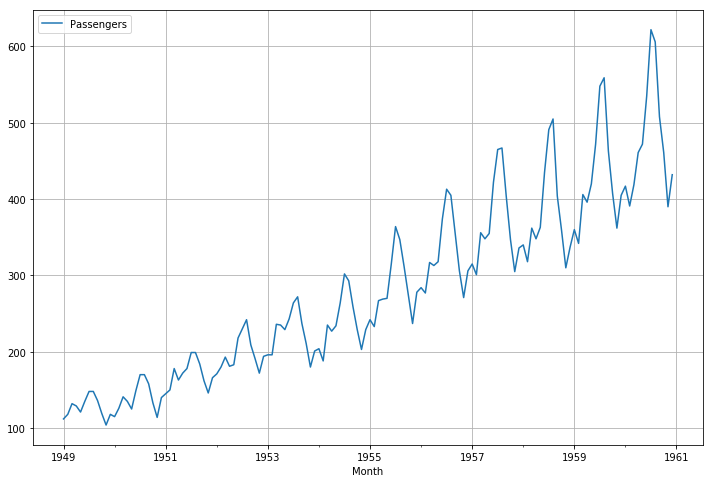

In [24]:
data_set.plot(grid=True)

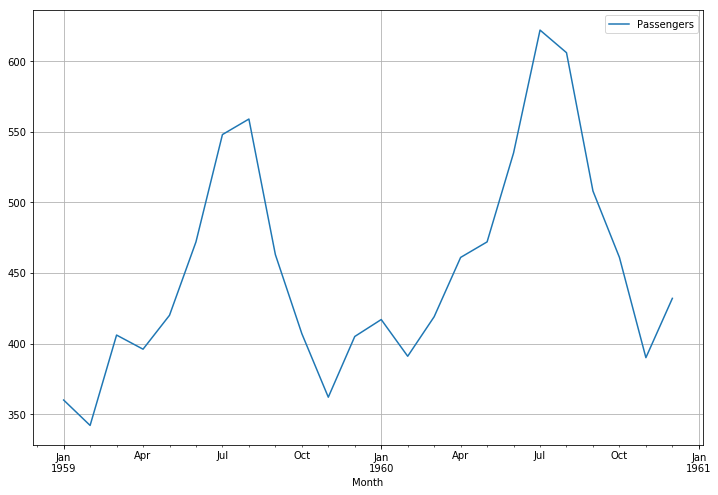

In [27]:
matplotlib.rcParams['figure.figsize'] = [12.0,8.0]
from datetime import datetime
start_date=datetime(1959,1,1)
end_date=datetime(1960,12,1)
data_set[(start_date <= data_set.index) & (data_set.index <= end_date)].plot(grid=True)

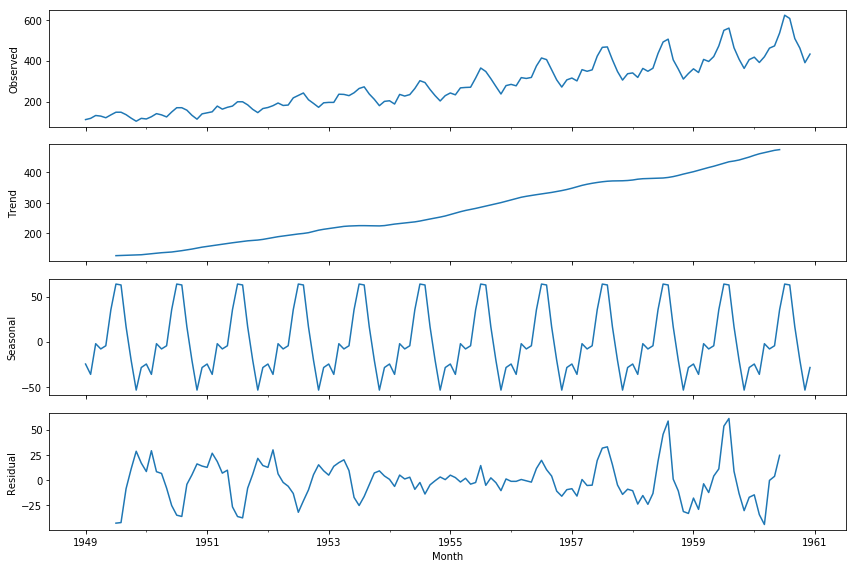

In [28]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data_set,model='additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

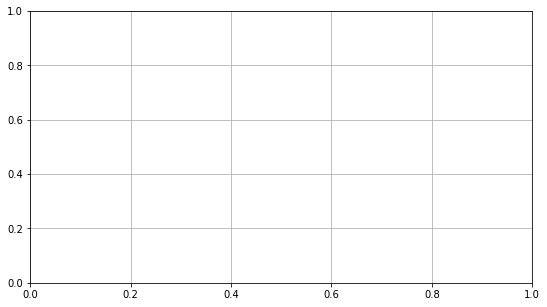

In [30]:
fig, ax = plt.subplots()
ax.grid(True)

In [32]:
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format=mdates.DateFormatter('%m')

In [33]:
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')

In [34]:
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

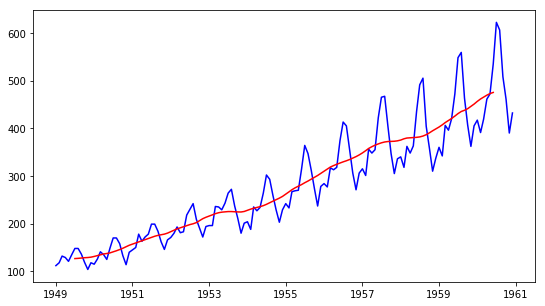

In [35]:
plt.plot(data_set.index, data_set['Passengers'], c='blue')
plt.plot(decomposition.trend.index,decomposition.trend, c='red')

# Upward trend with Seasonality